# 📈 💸 Time Series

Last update: Thursday, February 20th, 2025

## ℹ️ Readme

* ✍️ This challenge was written by [davydw](https://github.com/davydw)
* 🎯 The goal is to predict Apple Stock Price in the future using <font color="red">AR</font><font color="green">I</font><font color="blue">MA</font> model
* 🚓 It is designed only for students of `Le Wagon - Batch 1915 - Amsterdam` and cannot be reproduced without davydw's authorization. Indeed, he is no longer working as a full time employee at Le Wagon. Hence, the latter cannot claim and publish this recap on their learning platform `Kitt` without his consent.


## 📚 Libraries

In [ ]:
# DATA MANIPULATION
import pandas as pd
import numpy as np
import datetime

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# STATSMODELS = TIME SERIES ANALYSIS
## DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
## STATIONARITY ANALYSIS - HOW MANY ORDERS OF DIFFERENCING
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
## ACF AND PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
## ARIMA / SARIMA
from statsmodels.tsa.arima.model import ARIMA
## STATS GRIDSEARCH
import pmdarima as pm
## PLOT PREDICTION
from statsmodels.graphics.tsaplots import plot_predict

▶️ Run the following cell to install `yfinance`

In [63]:
!pip install yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


## 👨🏻‍🏫 Box Jenkins Method

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/lectures/machine-learning/time_serie_process_overview.jpg">

## (0) VISUALIZE

### (0.1) `AAPL` (1985-2025)

📈 [Apple Stock Price since 1985](https://finance.yahoo.com/quote/AAPL/history?period1=345427200&period2=1677715200&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true) - *Source: Yahoo Finance*

<img src="https://github.com/davydw/public-pictures/blob/main/data-illustrations/yahoo_finance_tuto_aapl_stock_price.png?raw=true" height = 200 width = 600 align = "left">

▶️ Run these cells to download the historical data for Apple Stock Price

In [64]:
import yfinance as yf
df = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [65]:
df.head

<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
1980-12-12    0.098726    0.099155    0.098726    0.098726  469033600
1980-12-15    0.093575    0.094005    0.093575    0.094005  175884800
1980-12-16    0.086707    0.087136    0.086707    0.087136  105728000
1980-12-17    0.088853    0.089282    0.088853    0.088853   86441600
1980-12-18    0.091429    0.091858    0.091429    0.091429   73449600
...                ...         ...         ...         ...        ...
2025-02-12  236.869995  236.960007  230.679993  231.199997   45243300
2025-02-13  241.529999  242.339996  235.570007  236.910004   53614100
2025-02-14  244.600006  245.550003  240.990005  241.250000   40896200
2025-02-18  244.470001  245.179993  241.839996  244.149994   48822500
2025-02-19  244.869995  246.009995  243.160004  244.660004  

In [66]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11137 entries, 1980-12-12 to 2025-02-19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11137 non-null  float64
 1   (High, AAPL)    11137 non-null  float64
 2   (Low, AAPL)     11137 non-null  float64
 3   (Open, AAPL)    11137 non-null  float64
 4   (Volume, AAPL)  11137 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 522.0 KB


⏰ Convert the date column into a `datetime` column.

👉 Set the `Date` column as the index of the DataFrame

👉 Keep only the `Close` column.

In [68]:
df = df[["Close"]]
df

Price,Close
Ticker,AAPL
Date,
1980-12-12,0.098726
1980-12-15,0.093575
1980-12-16,0.086707
1980-12-17,0.088853
1980-12-18,0.091429
...,...
2025-02-12,236.869995
2025-02-13,241.529999


### (0.2) First glimpse

📈 Visualize your Time Series

<Figure size 800x600 with 0 Axes>

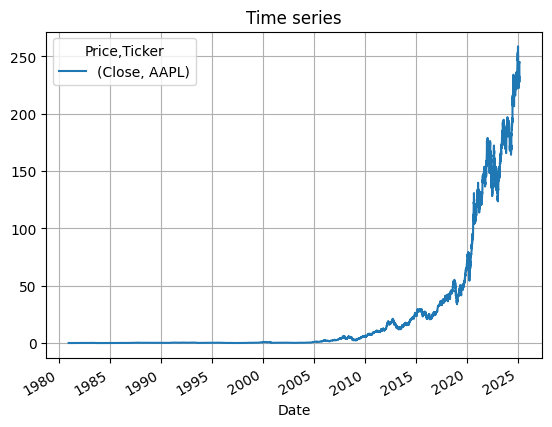

In [69]:
plt.figure(figsize=(8,6))
df.plot()
plt.title("Time series")
plt.grid()

### (0.3) Linearizing

📈 Exponential growth... consider the logarithm of the TS instead and visualize the "logarithmized" TS

In [70]:
log_df = np.log(df.Close)
log_df

Ticker,AAPL
Date,
1980-12-12,-2.315408
1980-12-15,-2.368989
1980-12-16,-2.445220
1980-12-17,-2.420770
1980-12-18,-2.392190
...,...
2025-02-12,5.467511
2025-02-13,5.486994
2025-02-14,5.499624


/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  func(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


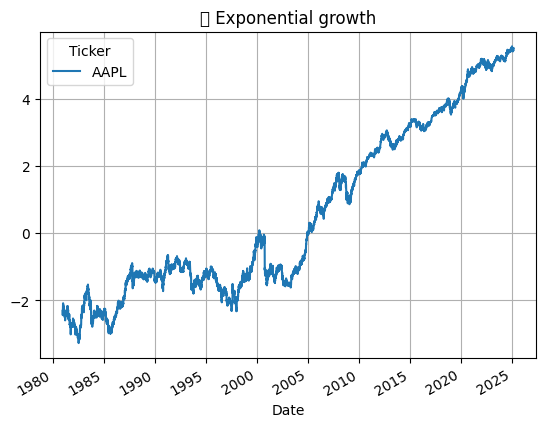

In [71]:
plt.figure(figsize=(8,6))
log_df.plot()
plt.title("📈 Exponential growth")
plt.grid()

👆 **Warnings**

* Time Series with negative values can't be decomposed multiplicatively...
* Apple stock price started skyrocketing after 2009...
* If you read a bit about Financial News, Apple proceeded to a stock split:
    - [Investopedia - Stocksplit](https://www.investopedia.com/terms/s/stocksplit.asp)
    - [Forbes 2020/07/31 - Apple announces a 4-for-1 split](https://www.forbes.com/sites/lcarrel/2020/07/31/apple-announces-4-for-1-stock-split-to-bring-in-new-investors/?sh=626f2e755401)

📆 Filter out the TS to keep values only starting from January 1st, 2020 and visualize it.

In [72]:
df.columns

MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])

In [73]:
new_df = df[df.index >= "2020-01-01"]
new_df.head

<bound method NDFrame.head of Price            Close
Ticker            AAPL
Date                  
2020-01-02   72.716080
2020-01-03   72.009132
2020-01-06   72.582893
2020-01-07   72.241562
2020-01-08   73.403648
...                ...
2025-02-12  236.869995
2025-02-13  241.529999
2025-02-14  244.600006
2025-02-18  244.470001
2025-02-19  244.869995

[1290 rows x 1 columns]>

In [74]:
new_df.tail

<bound method NDFrame.tail of Price            Close
Ticker            AAPL
Date                  
2020-01-02   72.716080
2020-01-03   72.009132
2020-01-06   72.582893
2020-01-07   72.241562
2020-01-08   73.403648
...                ...
2025-02-12  236.869995
2025-02-13  241.529999
2025-02-14  244.600006
2025-02-18  244.470001
2025-02-19  244.869995

[1290 rows x 1 columns]>

<AxesSubplot:xlabel='Date'>

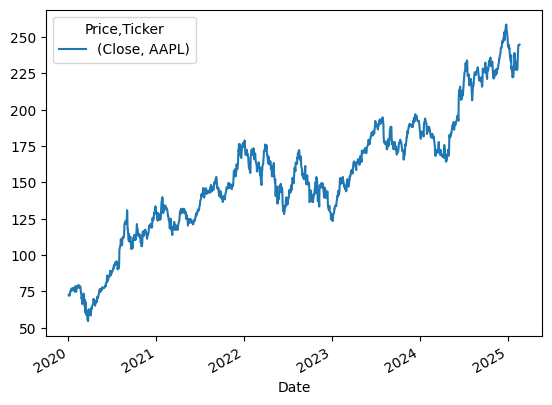

In [75]:
new_df.plot()

In [76]:
new_df["LogClose"] = np.log(new_df.Close)
new_df

/var/folders/z3/l7r21dgd7x3_xy94p142k_280000gn/T/ipykernel_6533/1294149084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["LogClose"] = np.log(new_df.Close)


Price,Close,LogClose
Ticker,AAPL,
Date,,
2020-01-02,72.716080,4.286563
2020-01-03,72.009132,4.276793
2020-01-06,72.582893,4.284729
2020-01-07,72.241562,4.280016
2020-01-08,73.403648,4.295974
...,...,...
2025-02-12,236.869995,5.467511
2025-02-13,241.529999,5.486994


<AxesSubplot:xlabel='Date'>

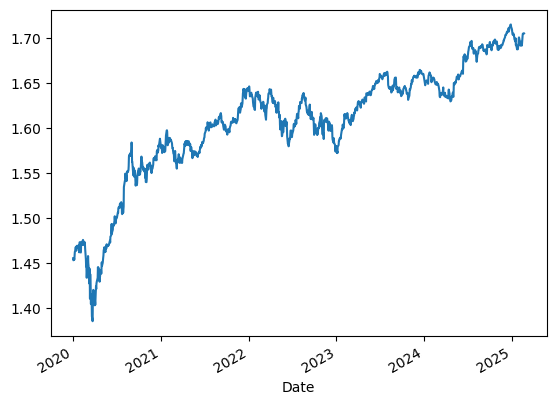

In [77]:
np.log(new_df.LogClose).plot()

## (1) DECOMPOSE

### (1.1) Decomposition of the "original" Time Series

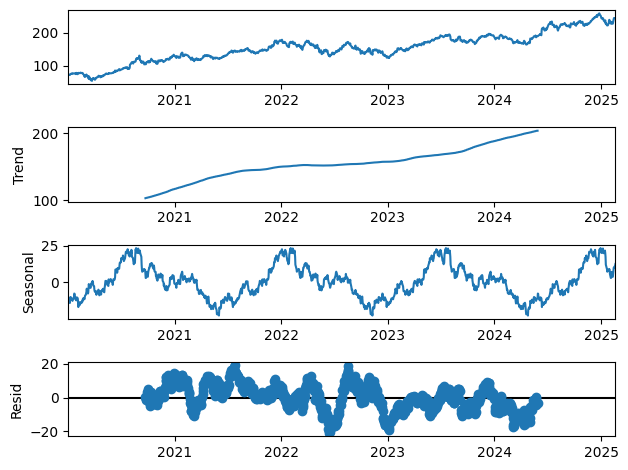

In [78]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
add_decom_data = seasonal_decompose(new_df["Close"], model="additive", period=365)
add_decom_data.plot();

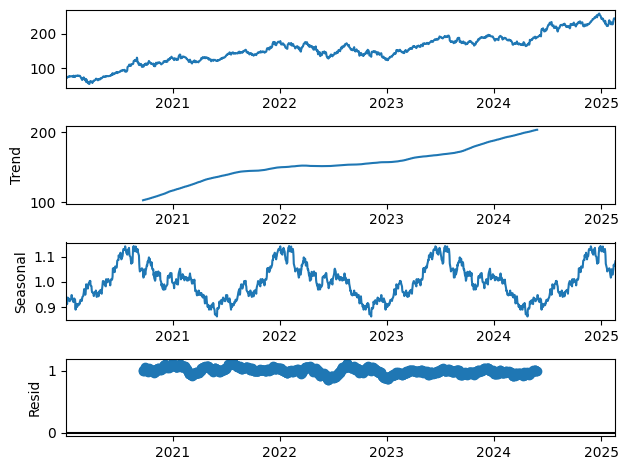

In [79]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
multiplicative_decom = seasonal_decompose(new_df["Close"], model="multiplicative", period=365)
multiplicative_decom.plot();

In [80]:
# Comparing the ADF tests for both residuals

In [81]:
adfuller(add_decom_data.resid.dropna())[1]

3.939170282118642e-05

In [82]:
adfuller(multiplicative_decom.resid.dropna())[1]

1.2245229335850463e-05

### (1.2) Decomposition the "logarithmized" Time Series

In [83]:
new_df

Price,Close,LogClose
Ticker,AAPL,
Date,,
2020-01-02,72.716080,4.286563
2020-01-03,72.009132,4.276793
2020-01-06,72.582893,4.284729
2020-01-07,72.241562,4.280016
2020-01-08,73.403648,4.295974
...,...,...
2025-02-12,236.869995,5.467511
2025-02-13,241.529999,5.486994


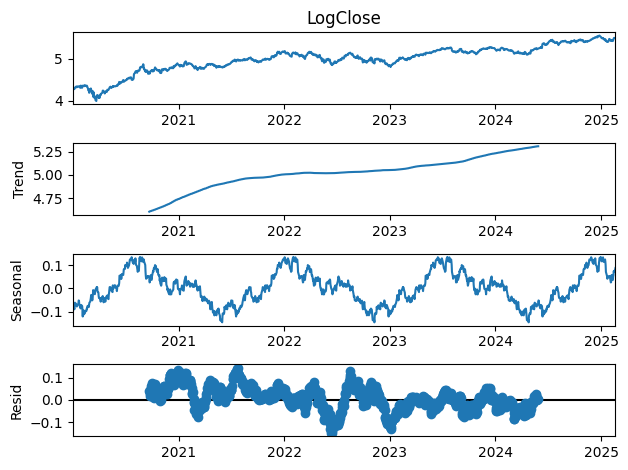

In [84]:
# Additive Decomposition (np.log(y) = Trend + Seasonal + Residuals)
add_decom_log_data = seasonal_decompose(new_df["LogClose"], model="additive", period=365)
add_decom_log_data.plot();

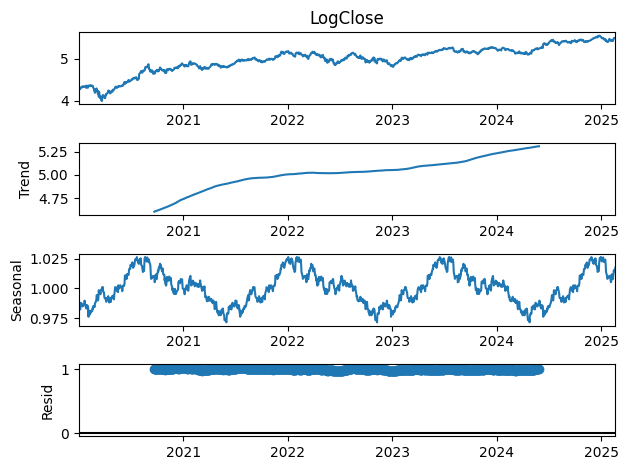

In [85]:
# Multiplicative Decomposition (np.log(y) = Trend * Seasonal * Residuals)
multi_decom_log_data = seasonal_decompose(new_df["LogClose"], model="multiplicative", period=365)
multi_decom_log_data.plot();

In [86]:
# Comparing the ADF tests for both residuals
adfuller(multi_decom_log_data.resid.dropna())[1]

3.2869226580884954e-05

In [87]:
adfuller(add_decom_log_data.resid.dropna())[1]

3.259761064234226e-05

### (1.3) Remove seasonality

<AxesSubplot:xlabel='Date'>

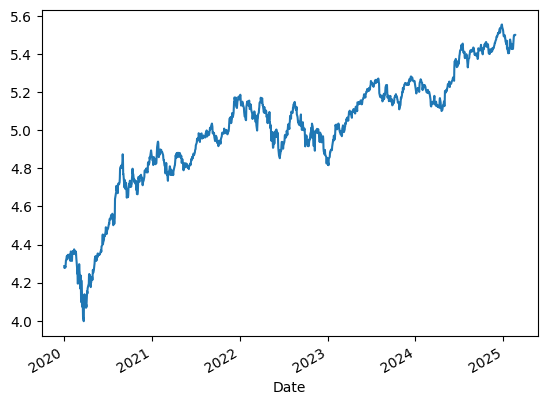

In [88]:

# Reminder: before removing seasonality, plot again the TS

new_df["LogClose"].plot()

In [89]:
# Removing the multiplicative seasonal component

new_df["DeseasonalizedLog"] = new_df["LogClose"] / multi_decom_log_data.seasonal
new_df["LogClose"]

/var/folders/z3/l7r21dgd7x3_xy94p142k_280000gn/T/ipykernel_6533/2808149463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["DeseasonalizedLog"] = new_df["LogClose"] / multi_decom_log_data.seasonal


Date
2020-01-02    4.286563
2020-01-03    4.276793
2020-01-06    4.284729
2020-01-07    4.280016
2020-01-08    4.295974
                ...   
2025-02-12    5.467511
2025-02-13    5.486994
2025-02-14    5.499624
2025-02-18    5.499093
2025-02-19    5.500727
Name: LogClose, Length: 1290, dtype: float64

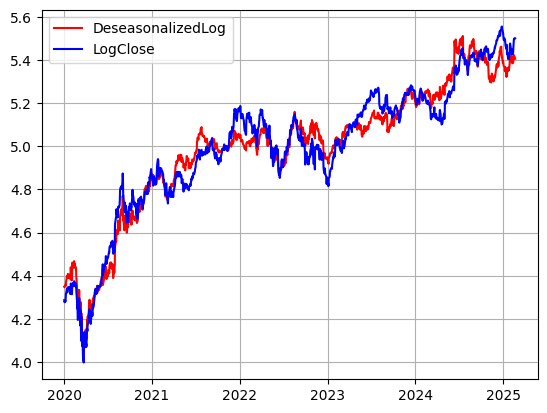

In [90]:
# Having a look at the deseasonalized LogClose
plt.plot(new_df["DeseasonalizedLog"], label="DeseasonalizedLog", c="red")
plt.plot(new_df["LogClose"], label="LogClose", c="blue")
plt.grid()
plt.legend()
plt.show()

👆 Our intuition is confirmed, there is no seasonality in the historic values of the `AAPL` stock price. But we can still work with the deseasonalized version and re-introduce it during the forecasts.

## (2) STATIONARITY / DIFFERENCING

🕵️‍♂️ How many times should you differentiate the logarithmized TS to achieve stationarity?

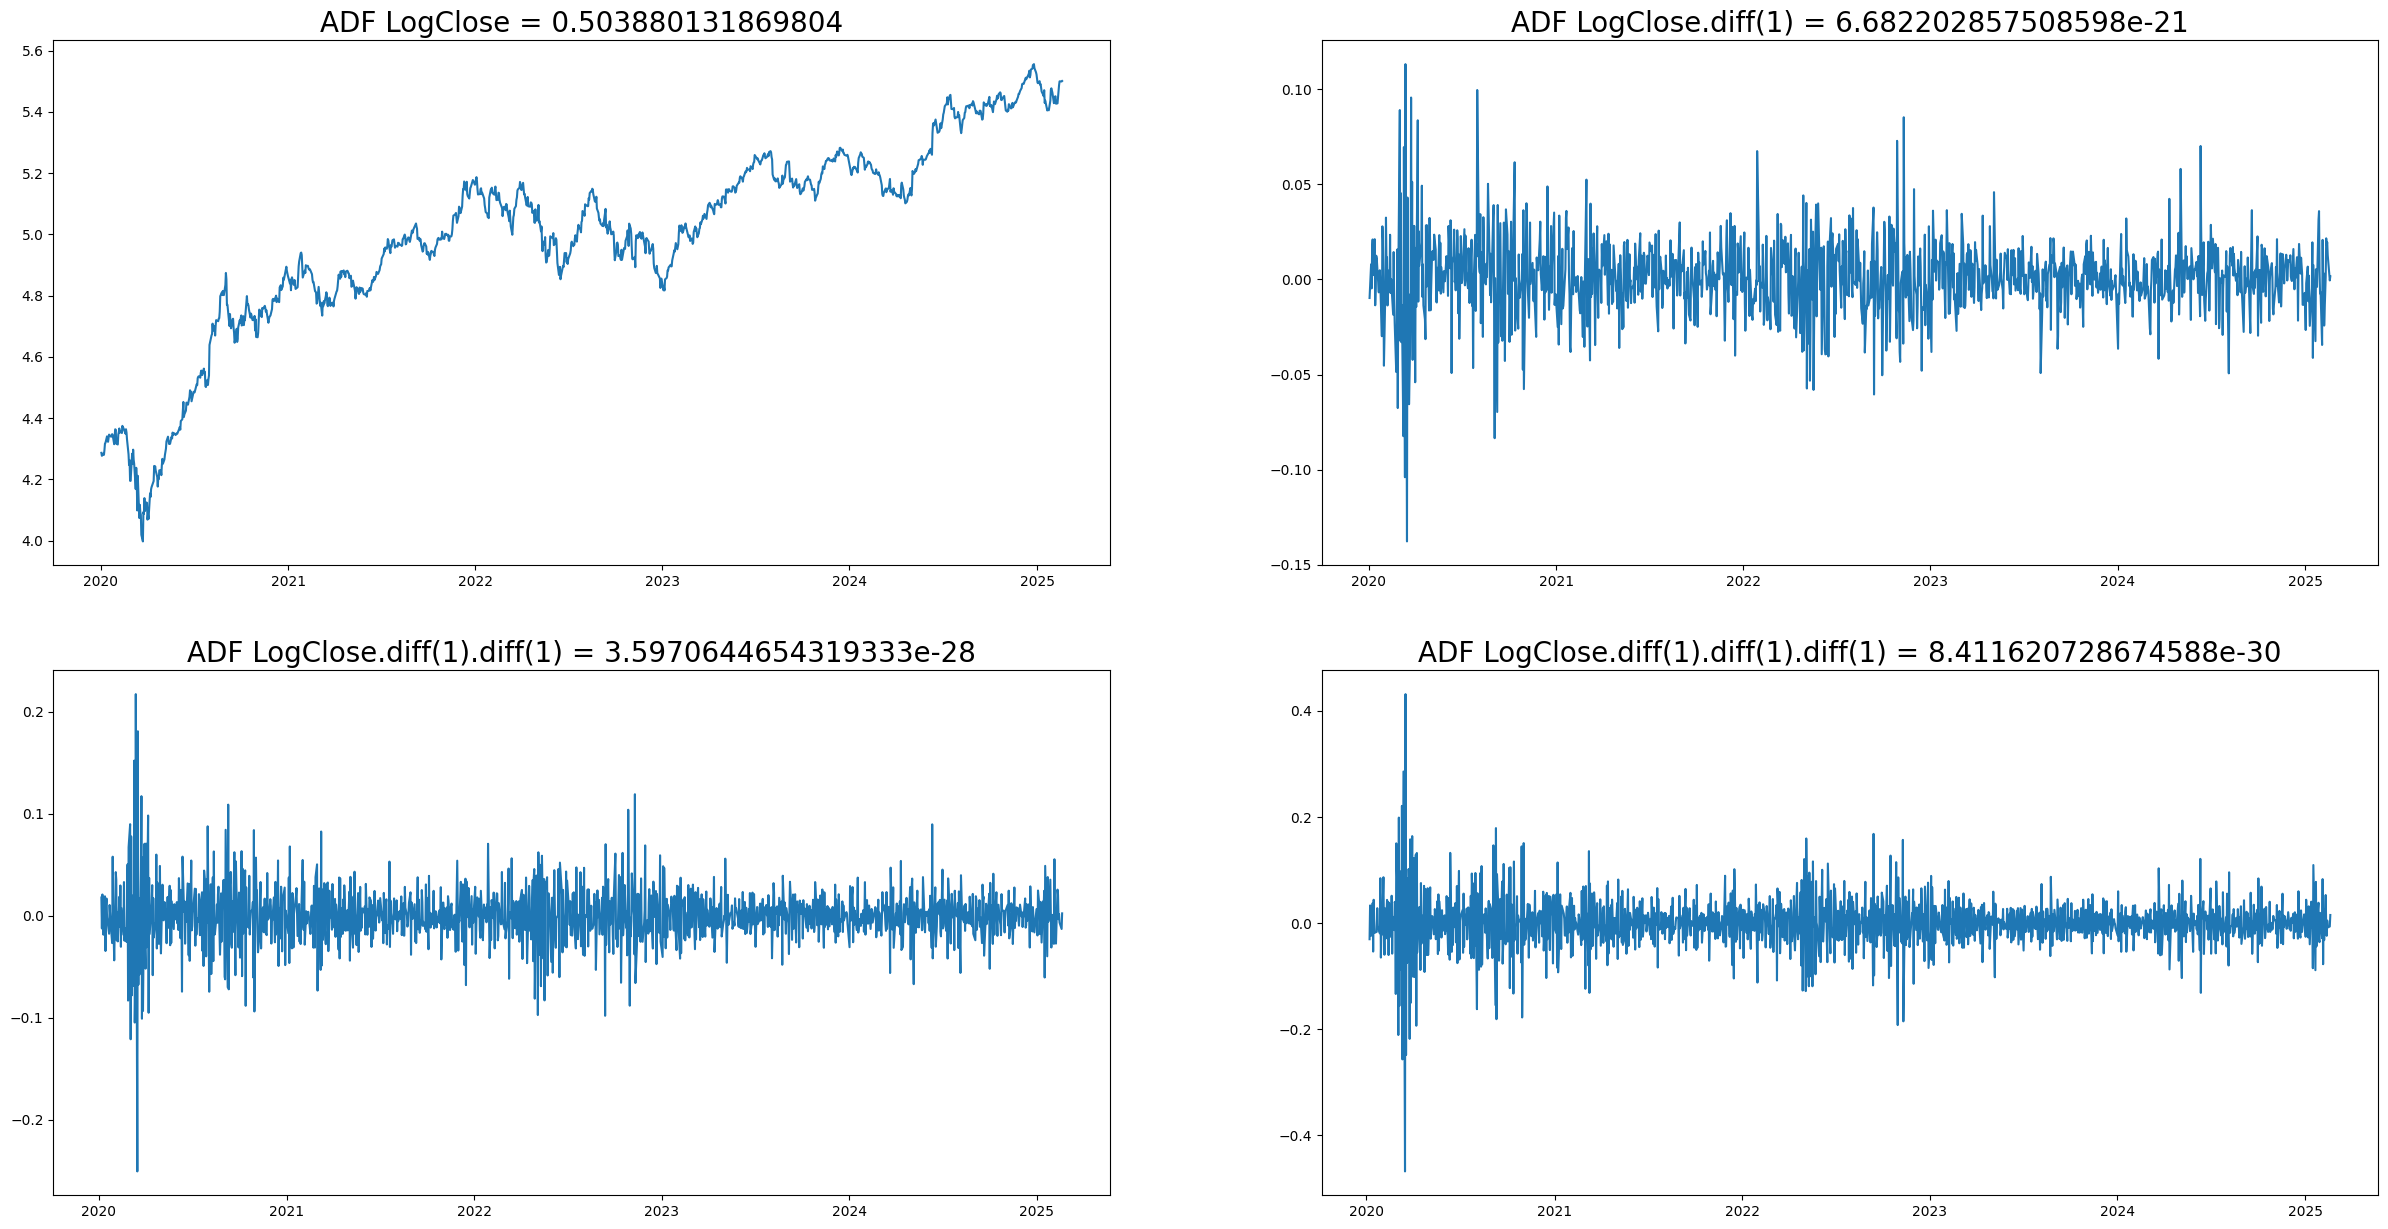

In [102]:
fig, ax = plt.subplots(2,2, figsize = (30,15))

ax[0][0].set_title(f"ADF LogClose = {adfuller(new_df.LogClose)[1]}", size = 20)
ax[0][0].plot(new_df["LogClose"])

ax[0][1].set_title(f"ADF LogClose.diff(1) = {adfuller(new_df.LogClose.diff(1).dropna())[1]}", size = 20)
ax[0][1].plot(new_df["LogClose"].diff(1).dropna())

ax[1][0].set_title(f"ADF LogClose.diff(1).diff(1) = {adfuller(new_df.LogClose.diff(1).diff(1).dropna())[1]}", size = 20)
ax[1][0].plot(new_df["LogClose"].diff(1).diff(1).dropna())

ax[1][1].set_title(f"ADF LogClose.diff(1).diff(1).diff(1) = {adfuller(new_df.LogClose.diff(1).diff(1).diff(1).dropna())[1]}", size = 20)
ax[1][1].plot(new_df["LogClose"].diff(1).diff(1).diff(1).dropna())

plt.show();

👆 Diffencing $\color{green}{d=1}$ should be enough!

In [110]:
y_diff = new_df["LogClose"].diff(1).dropna()

In [111]:
y_diff

Date
2020-01-03   -0.009770
2020-01-06    0.007936
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2025-02-12    0.018105
2025-02-13    0.019482
2025-02-14    0.012631
2025-02-18   -0.000532
2025-02-19    0.001635
Name: LogClose, Length: 1289, dtype: float64

## (3) <font color="blue">ACF</font> and <font color="red">PACF</font>

* How many <font color="red">lags</font> should you use for the <font color="red">AR</font> part ?
* How many <font color="blue">lags</font> should you use for the <font color="blue">MA</font> part ?

/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


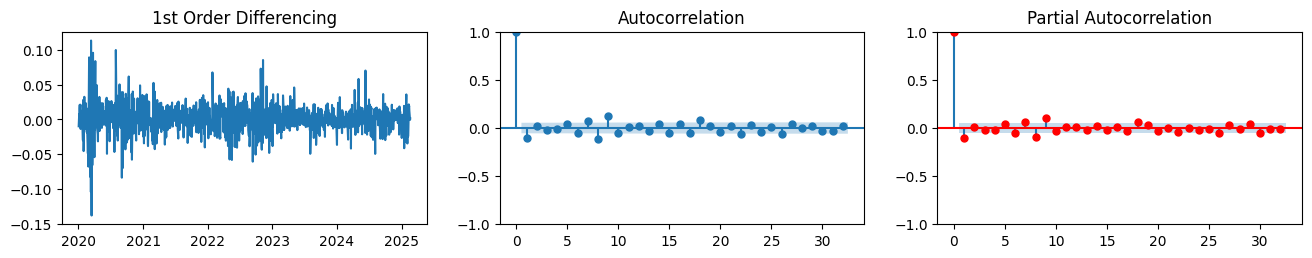

In [112]:
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

In [116]:
len(new_df)

1290

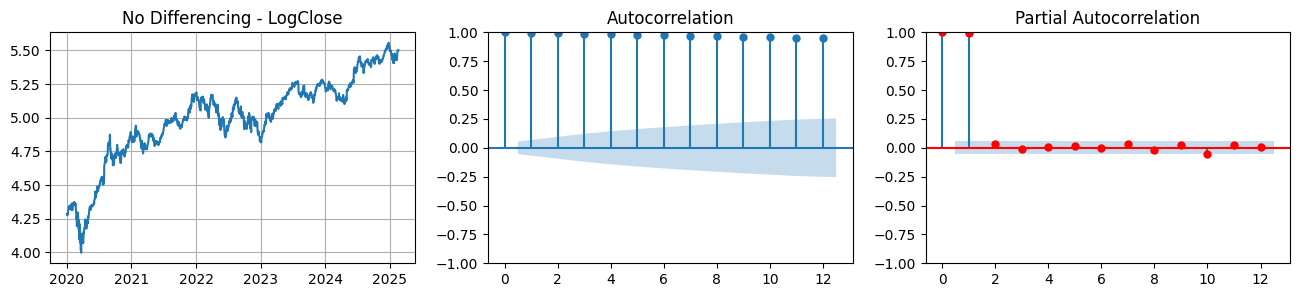

In [143]:
fig, ax = plt.subplots(1,3, figsize=(16,3))

ax[0].plot(new_df["LogClose"]);
ax[0].set_title("No Differencing - LogClose")
ax[0].grid()
plot_acf(new_df["LogClose"], lags=12, ax=ax[1]);
plot_pacf(new_df["LogClose"], lags=12, ax=ax[2], method='ywm' , color='r');

## (4) <font color="red">AR</font><font color="green">I</font><font color="blue">MA</font> MODEL

### (4.1) Choosing parameters visually

In [ ]:
p = 1 # PACF - RED
d = 1
q = 1 # ACF - BLUE

### (4.2) Temporal <font color="blue">Train</font>-<font color="orange">Test</font> split

In [144]:
train_ratio = 0.70
train_index_last = round(train_ratio * new_df.shape[0])
df_train = new_df.iloc[:train_index_last, :]
df_test = new_df.iloc[train_index_last:, :]

In [126]:
df_train

Price,Close,LogClose,DeseasonalizedLog
Ticker,AAPL,,
Date,,,
2020-01-02,72.716080,4.286563,4.348720
2020-01-03,72.009132,4.276793,4.345915
2020-01-06,72.582893,4.284729,4.353755
2020-01-07,72.241562,4.280016,4.357125
2020-01-08,73.403648,4.295974,4.352504
...,...,...,...
2023-07-28,194.142990,5.268595,5.154801
2023-07-31,194.757645,5.271756,5.156013


In [127]:
df_test

Price,Close,LogClose,DeseasonalizedLog
Ticker,AAPL,,
Date,,,
2023-08-04,180.422241,5.195300,5.124939
2023-08-07,177.309265,5.177895,5.125822
2023-08-08,178.251083,5.183193,5.142209
2023-08-09,176.654953,5.174198,5.129806
2023-08-10,176.436844,5.172963,5.123114
...,...,...,...
2025-02-12,236.869995,5.467511,5.405960
2025-02-13,241.529999,5.486994,5.405646


### (4.3) <font color="blue">Training</font>

In [145]:
arima = ARIMA(df_train["DeseasonalizedLog"], order = (p,d,q))
arima = arima.fit()

/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## (5) <font color="orange">FORECAST</font>

❗️ Keep in mind that we will have to revert to the "original" Time Series with two steps:
- "re-seasonalize"
- "exponentiate"

### (5.1) Forecasting future values for the  "logarithmized" and "deseasonalized" TS

In [ ]:
# Forecasting only the values without the confidence intervals
arima.forecast(len(df_test),alpha=0.05)

/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


903     5.142427
904     5.142891
905     5.142751
906     5.142793
907     5.142781
          ...   
1285    5.142784
1286    5.142784
1287    5.142784
1288    5.142784
1289    5.142784
Name: predicted_mean, Length: 387, dtype: float64

In [147]:
# 95% confidence
forecast_results = arima.get_forecast(len(df_test), alpha=0.05)

# Forecasts
forecast = forecast_results.predicted_mean


# Confidence intervals

confidence_int = forecast_results.conf_int().values


/Users/manjugokul/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
forecast_results

In [140]:
forecast

903     5.142427
904     5.142891
905     5.142751
906     5.142793
907     5.142781
          ...   
1285    5.142784
1286    5.142784
1287    5.142784
1288    5.142784
1289    5.142784
Name: predicted_mean, Length: 387, dtype: float64

In [141]:
confidence_int

array([[5.1050238 , 5.17983052],
       [5.09471933, 5.19106254],
       [5.08465567, 5.20084732],
       [5.07654559, 5.20904125],
       [5.06919645, 5.21636518],
       [5.06255458, 5.22301463],
       [5.05641124, 5.22915569],
       [5.05067988, 5.23488774],
       [5.04528393, 5.24028348],
       [5.04017161, 5.24539586],
       [5.0353021 , 5.25026535],
       [5.03064387, 5.25492359],
       [5.02617156, 5.2593959 ],
       [5.02186455, 5.2637029 ],
       [5.01770577, 5.26786169],
       [5.01368088, 5.27188658],
       [5.00977773, 5.27578972],
       [5.00598591, 5.27958155],
       [5.00229639, 5.28327107],
       [4.99870131, 5.28686614],
       [4.99519378, 5.29037367],
       [4.9917677 , 5.29379976],
       [4.98841764, 5.29714982],
       [4.98513875, 5.30042871],
       [4.98192669, 5.30364077],
       [4.97877752, 5.30678994],
       [4.97568769, 5.30987977],
       [4.97265397, 5.31291349],
       [4.9696734 , 5.31589405],
       [4.96674329, 5.31882416],
       [4.

### (5.2) Recomposing the original Time Series and the predictions

**Wrap-up**

1. We started from `df["Close"]`
2. Applied the `logarithm` function
3. `Deseasonalized` `df["LogClose"]`

**Reconstruction steps**

Let's reverse-engineer the Time Series

1. Reseasonalize `df["LogClose"]` multiplying by `result_mult_log.seasonal`
2. Apply the `exponential function`

In [ ]:
## TRAIN
train_reconstructed = np.exp(new_df["LogClose"] * multi_decom_log_data.seasonal)
train_reconstructed

Date
2020-01-02     68.394574
2020-01-03     67.273740
2020-01-06     67.815986
2020-01-07     66.971747
2020-01-08     69.420144
                 ...    
2025-02-12    252.084451
2025-02-13    262.319972
2025-02-14    264.498597
2025-02-18    267.496979
2025-02-19    269.721060
Length: 1290, dtype: float64

In [ ]:
## TEST
test_reconstructed = np.exp(new_df["LogClose"] * multi_decom_log_data.seasonal)
test_reconstructed

In [97]:
## FORECASTS
forecasts_reconstructed = None
forecasts_reconstructed

In [ ]:
## LOWER BOUND
lower_bound_reconstructed = None
lower_bound_reconstructed

In [99]:
## UPPER BOUND
upper_bound_reconstructed = None
upper_bound_reconstructed

### (5.3) Plots

In [134]:
def plot_forecast(fc, train, test,lower=None,upper=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);
